# Xarxes neuronals

Ara voldrem aprendre a classificar imatges, a partir d'un entrenament amb imatges i etiquetes (aprenentatge supervisat). Amb aquesta intenció, farem servir el mòdul de Keras (que utilitza per sota TensorFlow de Google). Per poder veure les imatges, farem servir matplotlib.

In [3]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 7.5 MB/s eta 0:00:000m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:00:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 11.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 10.9 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 12.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━

In [6]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import copy
import tensorflow

En el primer experiment usarem el dataset MNIST. MNIST és un dataset d'imatges de números escrits a mà. L'objectiu de la tasca és aprendre a reconèixer els 10 dígits.

In [8]:
#Import dataset from Keras
from tensorflow.keras.datasets import mnist
#Load train data, train labels, test data and test labels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print( "Nombre d'imatges per entrenament:", x_train.shape[0])
print( "Nombre d'imatges per avaluació:", x_test.shape[0])
print( "Tamany de les imatges:", x_train.shape[1:])

11490434/11490434 [==============================] - 1s 0us/step
Nombre d'imatges per entrenament: 60000
Nombre d'imatges per avaluació: 10000
Tamany de les imatges: (28, 28)


<img src=mnist.png width='450px'>

[Image source](https://www.researchgate.net/publication/306056875_An_analysis_of_image_storage_systems_for_scalable_training_of_deep_neural_networks)

## Preprocessat

Tenim 60,000 imatges de 28x28 píxels. Si fossin imatges en color, necesitariem una altra dimensió per representar els 3 canals del color (és a dir, 28x28x3, usant els colors primaris vermell, verd i blau, o RGB). 
Visualitzem una de les imatges del dataset:

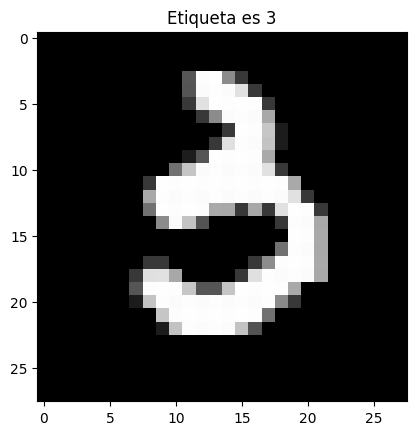

In [9]:
#Tria una imatge del conjunt d'entrenament al atzar
import random
index_imatge = random.randint(1,x_test.shape[0])
#Visualitza usant matplotlib
plt.title('Etiqueta es {label}'.format(label=y_train[index_imatge]))
plt.imshow(x_train[index_imatge], cmap='gray')
plt.show()

Per introduïr les imatges a una FNN ens cal preparar-les. Considerarem cada pixel de la imatge com una variable independent, aixi que convertirem la imatge en un vector de longitud 784 (28x28). Cada neurona de la primera capa de la FNN tindrá una entrada de 784 valors.

<center><img src=mnist_reshape.png width='800px'></center>

[Image source](https://puture.tistory.com/385)

In [9]:
#Transforma les imatges a vectors
x_train = x_train.reshape(60000, 28*28)
#Fem una copia per us posterior
original_test = copy.deepcopy(x_test)
x_test = x_test.reshape(10000, 28*28)

També és recomanat normalitzar les dades. Ara mateix, els valors del vector són nombres naturals entre 0 (negre) i 255 (blanc). La xarxa aprendrà més fàcilment si normalitzem aquests valors al rang [0,1] usant decimals.

In [10]:
print("Fragment del vector pre-normalització:", x_train[0, 201:206])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print("Fragment del vector post-normalització:", x_train[0, 201:206])

Fragment del vector pre-normalització: [  0   0  49 238 253]
Fragment del vector post-normalització: [0.         0.         0.19215687 0.93333334 0.99215686]


També cal que ajustem les etiquetes associades a les imatges a les necessitats de la FNN. L'etiqueta en aquest cas és una dada 'categòrica', és a dir: pot prendre un valor d'un conjunt de valors finit en què no existeix ordre. Malgrat que en aquest problema sembla que n'hi ha un ordre entre les etiquetes, aquest ordre no és rellevant de cara a classificar imatges.

La sortida de la xarxa neuronal representa un conjunt de probabilitats per a cada imatge. Per exemple, la sortida:
[0, 0, 0, 0, 0.25, 0, 0.5, 0.25, 0, 0]
Indica una probabilitat del 25% de les etiquetes '4' i '7', i una probabilitat del 50% de l'etiqueta '6'.
Per poder calcular l'error de la xarxa en la seua predicció, usem una representació anàloga de les etiquetes. Així doncs una imatge amb etiqueta '6' tindrà la següent representació:
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
I l'error de la xarxa és calcularà com la diferència entre ambdós vectors. Aquest tipus de representació s'anomena one-hot vector encoding.

<img src=one_hot.PNG width='500px'>

In [11]:
from tensorflow.python.keras.utils import to_categorical
print("Format original:",y_train[0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("Format one-hot:",y_train[0])

Format original: 5
Format one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Xarxa neuronal Feed-forward

Ara ja podrem passar a definir la nostra xarxa. Comencem amb una xarxa neuronal de dues capes amb 32 i 16 neurones respectivament. Totes amb funció d'activació ReLU. La capa de sortida tindrà 10 neurones (1 per classe/etiqueta), usant la funció softmax per a obtenir probabilitats per classe.

In [12]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense

nn = Sequential()
nn.add(Dense(32,activation='relu',input_shape=(784,)))
nn.add(Dense(16,activation='relu'))
nn.add(Dense(10, activation='softmax'))

2022-02-21 12:50:51.582357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-21 12:50:51.582391: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-21 12:50:51.582407: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-02-21 12:50:51.582615: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Ara ens queda definir l'optimitzador i els seus paràmetres. Optimitzarem fent servir 'Stochastic Gradient Descent' (sgd), avaluant el nostre error amb la funció 'Categorical Crossentropy' (que és l'adequada quan fem servir softmax), i optimitzarem per millorar la 'accuracy' del model.

In [14]:
nn.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

<img src=categorical_cross_entropy.png width='400px'>
<img src=loss.png width='400px'>


Font de les imatges i més informació sobre la 'cross-entropy' [aquí](https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451).

Ja podem començar a entrenar la xarxa amb les dades d'entrenament. Ho farem en lots de 128 imatges (batch size). Quan hàgim vist totes les imatges (1 epoch), tornarem a començar. En total, passarem cada imatge 10 vegades per la xarxa (10 epochs).

A l'output veiem en quina epoch estem, l'error comès en aquesta epoch (loss) que la xarxa pretén minimitzar, i la precisió obtinguda (accuracy) en les dades d'entrenament.

In [15]:
#Start training
nepochs=10
history = nn.fit(x_train,y_train,batch_size=128,epochs=nepochs)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.5009 - accuracy: 0.5548
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6460 - accuracy: 0.8322
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.8719
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8880
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8971
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.9044
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.9089
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2983 - accuracy: 0.9139
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2847 - accuracy: 0.9175
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.9208

El rendiment al conjunt d'entrenament és prou bo (91%-92% de precisió). Però falta per veure si aquest es manté en les dades d'avaluació. Així veurem si el model entrenat generalitza bé a noves dades.


In [16]:
score = nn.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 0.2597501575946808
test accuracy: 0.9240999817848206


Malgrat que els nombres no son els mateixos, sembla que la xarxa generalitza prou bé. 
Ara anem a visualitzar el entrenament amb les corves de precisió i error.

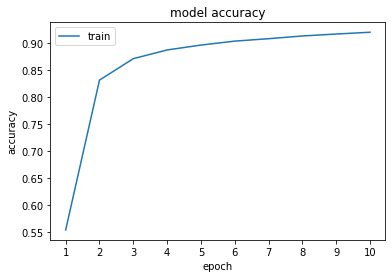

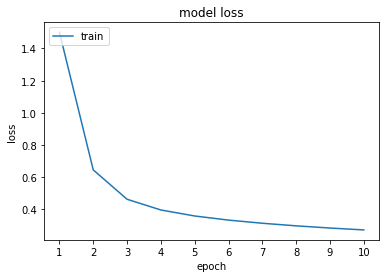

In [17]:
acc_plot = plt.figure(1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)])
plt.legend(['train'], loc='upper left')
plt.show()

loss_plot = plt.figure(2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)])
plt.legend(['train'], loc='upper left')
plt.show()

Sembla que la xarxa a aprés d'una manera continuada. També sembla que la tendència era a millorar, així que potser seria bona idea donar-li més epochs per a obtenir millors resultats.

Finalment, anem a veure la relació d'encerts i errors, usant una matriu de confusió. La matriu de confusió mostra les prediccions fetes junt amb les etiquetes reals. Permet veure on s'han comès els errors.

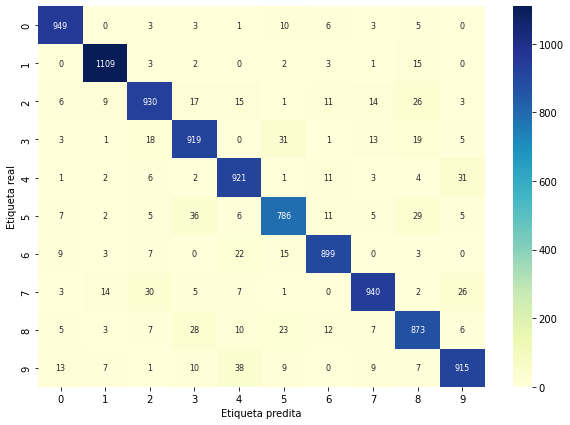

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd

#Predir el test i contrastar-lo amb els valors reals.
Y_pred = nn.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

df_cm = pd.DataFrame(confusion_matrix(np.argmax(y_test,axis=1), y_pred), index = range(10), columns = range(10))
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap="YlGnBu", fmt='g');
plt.ylabel("Etiqueta real")
plt.xlabel("Etiqueta predita")
plt.show()

Sembla que els errors estan molt repartits. L'etiqueta pitjor predita és el 5, que molt sovint es classifica com l'etiqueta 3.

Anem a veure exemples d'errors comesos. Molts són errors raonables.

In [19]:
errors = [(i, predit, np.argmax(real)) for i,(predit, real) in enumerate(zip(y_pred, y_test)) if predit!=np.argmax(real)]

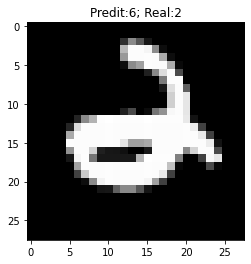

In [20]:
import random
index_error = random.randint(0,len(errors))
error_a_analitzar = errors[index_error]
plt.title("Predit:"+str(error_a_analitzar[1])+"; Real:"+str(error_a_analitzar[2]))
plt.imshow(original_test[error_a_analitzar[0]], cmap='gray')
plt.show()

Com podem veure, els errors són les imatges especialment problemàtiques.

# CIFAR DATASET


Ara anem a treballar amb un problema una mica més complicat. Imatges en color representant diversos objectes.


In [21]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import copy
from tensorflow.python.keras import utils

Using Keras version 2.8.0


Importem el dataset CIFAR10, que té classes d'animals i vehicles.

In [22]:
from tensorflow.python.keras.datasets import cifar10

(original_x_train, y_train), (original_x_test, y_test) = cifar10.load_data()
# Located in ~/.keras/datasets and probably need untarred
x_train = copy.deepcopy(original_x_train)
x_test = copy.deepcopy(original_x_test)
print( "Número d'imatges per entrenament:", x_train.shape[0])
print( "Número d'imatges per avaluació:", x_test.shape[0])
print( "Tamany de les imatges:", x_train.shape[1:])

Número d'imatges per entrenament: 50000
Número d'imatges per avaluació: 10000
Tamany de les imatges: (32, 32, 3)


En aquest cas les imatges tenen profunditat, ja que tenim canal de color. Caldrà adaptar el codi.

Per entendre millor les classes, https://www.cs.toronto.edu/~kriz/cifar.html té una guía que ens transforma la etiqueta numèrica en la classe en paraules.

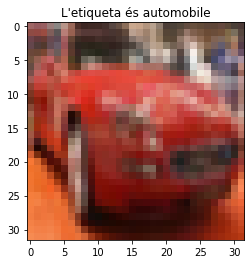

In [23]:
label_map=['airplane','automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']
import random
index_imatge = random.randint(0,9)
plt.title("L'etiqueta és {label}".format(label=label_map[y_train[index_imatge][0]]))
plt.imshow(x_train[index_imatge], cmap='gray')
plt.show()

Prepararem les dades igual que abans. Ara els vectors seran de 3,072 posicions (32x32x3).

In [24]:
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense

nn = Sequential()
nn.add(Dense(32, activation='relu', input_shape=(32*32*3,)))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(10, activation='softmax'))
nn.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
nepochs=20
history = nn.fit(x_train,y_train,batch_size=128,epochs=nepochs)

Epoch 1/20


2022-02-21 12:51:39.200350: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


391/391 [==============================] - 2s 3ms/step - loss: 2.1133 - accuracy: 0.2140
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 1.9465 - accuracy: 0.3023
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8878 - accuracy: 0.3275
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8439 - accuracy: 0.3482
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 1.8093 - accuracy: 0.3593
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 1.7759 - accuracy: 0.3700
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 1.7495 - accuracy: 0.3813
Epoch 8/20
391/391 [==============================] - 1s 4ms/step - loss: 1.7230 - accuracy: 0.3898
Epoch 9/20
391/391 [==============================] - 1s 3ms/step - loss: 1.7046 - accuracy: 0.3972
Epoch 10/20
391/391 [==============================] - 1s 3ms/step - loss: 1.6864 - accuracy: 0.4050
Epoch 11/2

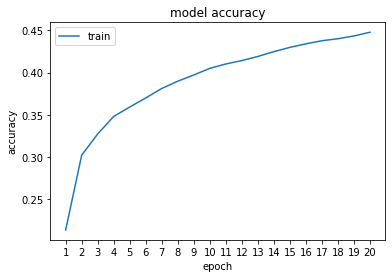

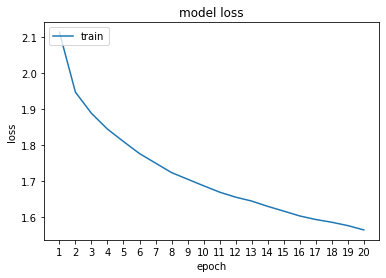

In [27]:
acc_plot = plt.figure(1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['train'], loc='upper left')
plt.show()

loss_plot = plt.figure(2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['train'], loc='upper left')
plt.show()

In [28]:
score = nn.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 1.5942871570587158
test accuracy: 0.42559999227523804


Els resultats no son tan bons en aquest problema. Al voltant del 40%.
Podeu extreure quines són les classes del test on més s'equivoca?
Podeu veure les imatges erronies?
Podeu millorar la accuracy de test?
I quant la podeu millorar?

# Tornem a les slides!
<img src="end_1.png">

## Xarxes convolucionals

El preprocessing és similar al que hem fet abans, però les neurones convolucionals de la primera capa necessiten les entrades en 3 dimensions. L'ordre de les dimensions depèn del backend.

In [29]:
from tensorflow.python.keras import backend as K

img_rows, img_cols, channels = 32, 32, 3
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)
print(x_train.shape)

(50000, 32, 32, 3)


Definim la nostra xarxa. Tornarem a tenir tres capes ocultes de 32, 16 i 16 neurones, i una de sortida que serà una softmax de 10 posicions.

A diferència que abans, però, les dues primeres capes seran convolucionals. Ambdues usaran kernels (filtres) de 2 per 2. Després de cada capa convolucional, farem un 'pooling', agafant el valor màxim de cada quatre píxels (per reduir les dimensions de la sortida de la capa). Per últim, entre la segona capa convolucional i la primera capa no convolucional (fully connected), haurem d'aplanar les dades a un vector (com abans hem fet en el preprocessing).

Tornarem a usar els mateixos paràmetres per optimització que abans.

In [30]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 

nn = Sequential()
nn.add(Conv2D(filters=32, kernel_size=(2, 2), input_shape=input_shape, activation='relu', padding='same', strides=(2,2)))
nn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
nn.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=16))
nn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
nn.add(Flatten())
nn.add(Dense(16, activation='relu'))
nn.add(Dense(10, activation='softmax'))
nn.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#print(nn.summary())

Notem que ara, en entrenar, ens deixem un 15% d'imatges per validació. Per tant, també ens apareixeran la loss i la accuracy de la validació a part. L'entrenament de la nova xarxa trigarà una mica més que abans.

In [31]:
nepochs=10
history = nn.fit(x_train,y_train,batch_size=128,epochs=nepochs, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 8s 24ms/step - loss: 2.2730 - accuracy: 0.1508 - val_loss: 2.2282 - val_accuracy: 0.1843
Epoch 2/10
313/313 [==============================] - 7s 23ms/step - loss: 2.1418 - accuracy: 0.2123 - val_loss: 2.0491 - val_accuracy: 0.2427
Epoch 3/10
313/313 [==============================] - 8s 24ms/step - loss: 1.9713 - accuracy: 0.2888 - val_loss: 1.9186 - val_accuracy: 0.3112
Epoch 4/10
313/313 [==============================] - 9s 29ms/step - loss: 1.8955 - accuracy: 0.3210 - val_loss: 1.8921 - val_accuracy: 0.3224
Epoch 5/10
313/313 [==============================] - 9s 29ms/step - loss: 1.8426 - accuracy: 0.3395 - val_loss: 1.8486 - val_accuracy: 0.3253
Epoch 6/10
313/313 [==============================] - 9s 30ms/step - loss: 1.7925 - accuracy: 0.3589 - val_loss: 1.8243 - val_accuracy: 0.3425
Epoch 7/10
313/313 [==============================] - 8s 27ms/step - loss: 1.7370 - accuracy: 0.3780 - val_loss: 1.8841 - val_accuracy: 0.3500

De nou, farem un estudi sobre els nostres propis resultats

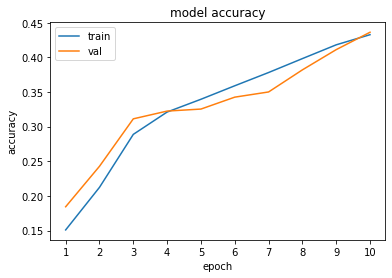

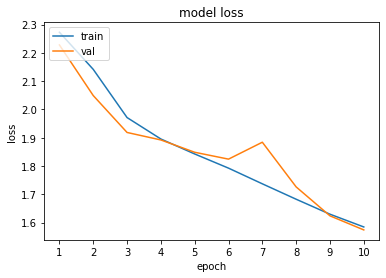

test loss: 1.5535118579864502
test accuracy: 0.4442000091075897


In [32]:
acc_plot = plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)])
plt.legend(['train','val'], loc='upper left')
plt.show()

loss_plot = plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks([x for x in range(nepochs)], [x+1 for x in range(nepochs)])
plt.legend(['train','val'], loc='upper left')
plt.show()


score = nn.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

Com milloraríeu les xarxes? Quin és el millor resultat d'accuracy en el test que podeu obtenir?